<a href="https://colab.research.google.com/github/ben854719/Nvidia---GEN-AI-/blob/main/Nvidia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# import the dataset from Nvidia.
Stock_Nvidia_df = pd.read_csv('Stock_Nvidia.csv')

# Create Scaler Object
scaler = StandardScaler()

numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Fit the scaler to the numerical features.
scaler.fit(Stock_Nvidia_df[numerical_features])

# Transform the data.
Stock_Nvidia_df[numerical_features] = scaler.transform(Stock_Nvidia_df[numerical_features])

# Create the tensor of input features
X = torch.tensor(Stock_Nvidia_df[numerical_features].values, dtype=torch.float32)
Y = torch.tensor(Stock_Nvidia_df['Close'].values, dtype=torch.float32)


In [ ]:
# Train the model of the dataset.
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
# set a random seed.
torch.manual_seed(42)

# Define the model using nn.Sequential.
model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

# MSE Loss Function + optimizer.
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000

epoch_format = 'Epoch[{0}'+ str(num_epochs)+'], MSE Loss:{1}'

for epoch in range(num_epochs):
  predictions = model(x_train)
  MSE = loss_fn(predictions, y_train)
  MSE.backward()
  optimizer.step()
  optimizer.zero_grad()

  if (epoch + 1) % 100 == 0:
    print(epoch_format.format(epoch + 1, MSE.item()))





Epoch[1001000], MSE Loss:1.2851313352584839
Epoch[2001000], MSE Loss:1.153443455696106
Epoch[3001000], MSE Loss:1.1113479137420654
Epoch[4001000], MSE Loss:1.0959606170654297
Epoch[5001000], MSE Loss:1.0884671211242676
Epoch[6001000], MSE Loss:1.0841143131256104
Epoch[7001000], MSE Loss:1.081347942352295
Epoch[8001000], MSE Loss:1.079489827156067
Epoch[9001000], MSE Loss:1.0781779289245605
Epoch[10001000], MSE Loss:1.0772162675857544


In [ ]:
torch.save(model, 'model.pth')

In [ ]:
load_model =  torch.load('model.pth')
load_model.eval()
with torch.no_grad():
  predictions = load_model(x_test)
  MSE = loss_fn(predictions, y_test)
  print(MSE)

  **** Note: I use tensor(pytorch) the format load model will not use the format again because it is a privacy concern from Github. I am using google colab than jupyter notebook for my work. ****


tensor(0.7142)


<ipython-input-23-1dc574b945c3>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model =  torch.load('model.pth')


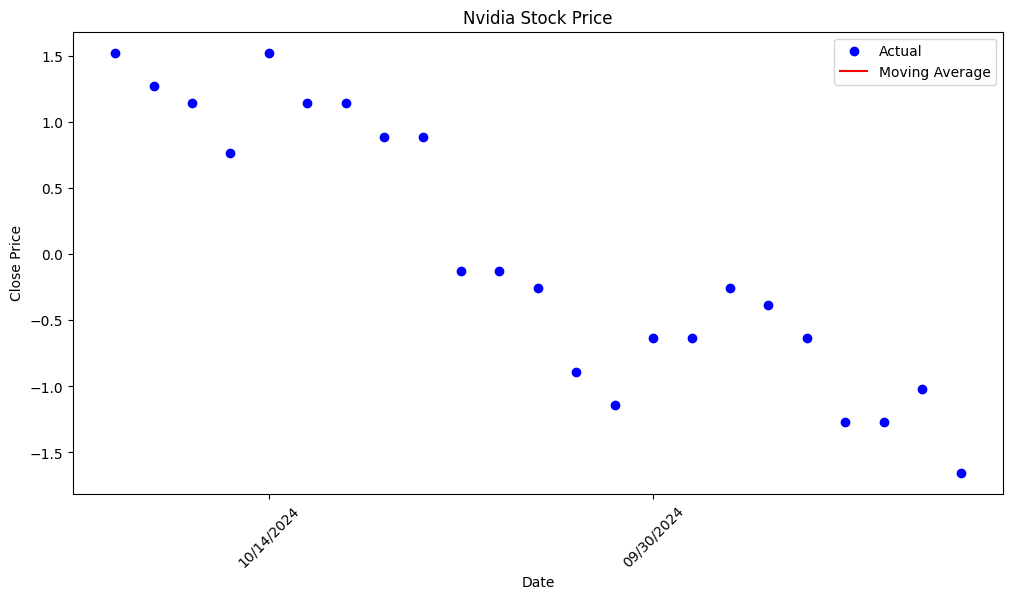

In [ ]:
# Data Visualization of the dataset of Nvidia.

plt.figure(figsize=(12, 6))
plt.scatter(Stock_Nvidia_df['Date'], Stock_Nvidia_df['Close'], label='Actual', color='blue')
plt.plot(Stock_Nvidia_df['Date'], Stock_Nvidia_df['Close'].rolling(window=100).mean(), label='Moving Average', color='red')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Close Price')
plt.title('Nvidia Stock Price')
plt.legend()
plt.show()


